In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

import pickle

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


## TensorBoard

In [3]:
log_directory = 'logs\\fit_' + datetime.datetime.now().strftime("%Y-%m-%d--%H-%M")
board = TensorBoard(log_dir=log_directory,histogram_freq=1,
    write_graph=True,
    write_images=True,
    update_freq='epoch',
    profile_batch=2,
    embeddings_freq=1)

In [4]:
pwd

'C:\\Users\\andre\\Documents\\ML_Models\\Supervised\\Regression\\08_Artificial_Neural_Network'

tensorboard --logdir logs\fit 

http://localhost:6006/#scalars

## Import Dataset

In [5]:
df_pen = sns.load_dataset('penguins')

In [6]:
df_pen = df_pen.dropna()

In [7]:
df_pen = df_pen.sample(frac=1).reset_index(drop=True)

In [8]:
X = df_pen.drop(['body_mass_g'], axis = 1)
y = df_pen['body_mass_g']

## Data Pre-processing

In [9]:
# categorical_x = ['species', 'island', 'sex']
# numerical_x = X.drop(categorical_x, axis = 1).columns

In [10]:
# ## If y is categorical:
# # y.fillna(y.mode(), inplace= True)
# ##If y is numerical
# y.fillna(y.mean(), inplace= True)
# for i in numerical_x:
#     X[i].fillna(X[i].mean(), inplace = True)

# for i in categorical_x:
#     X[i].fillna(X[i].mode().iloc[0], inplace = True)
    
# categoricas = pd.get_dummies(X[categorical_x], drop_first=True)
# X = pd.concat([categoricas, X[numerical_x]], axis = 1)

In [11]:
X = pd.get_dummies(X, drop_first = True)

In [12]:
X.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_Male
0,50.6,19.4,193.0,1,0,1,0,1
1,42.5,16.7,187.0,1,0,1,0,0
2,41.1,18.2,192.0,0,0,0,0,1
3,50.2,14.3,218.0,0,1,0,0,1
4,43.3,14.0,208.0,0,1,0,0,0


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=101)

In [14]:
escalador = StandardScaler()
escalador.fit(X_train)

X_train = escalador.transform(X_train)
X_test = escalador.transform(X_test)

## Model implementation

In [15]:
X.shape

(333, 8)

In [16]:
model = Sequential()

model.add(Dense(8,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(4,activation='relu'))

# Final output node for prediction
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse', metrics=[ 'MeanAbsoluteError', 'RootMeanSquaredError'])

In [17]:
model.fit(x=X_train,
          y=y_train,
          validation_data=(X_test,y_test.values),
          batch_size=32,
          epochs=400, 
          verbose = 1)

Epoch 1/400
8/8 [==============================] - 2s 45ms/step - loss: 18097786.0000 - mean_absolute_error: 4178.9805 - root_mean_squared_error: 4254.1494 - val_loss: 18916120.0000 - val_mean_absolute_error: 4271.6724 - val_root_mean_squared_error: 4349.2666
Epoch 2/400
8/8 [==============================] - 0s 17ms/step - loss: 18096890.0000 - mean_absolute_error: 4178.8789 - root_mean_squared_error: 4254.0439 - val_loss: 18914984.0000 - val_mean_absolute_error: 4271.5479 - val_root_mean_squared_error: 4349.1357
Epoch 3/400
8/8 [==============================] - 0s 18ms/step - loss: 18095846.0000 - mean_absolute_error: 4178.7627 - root_mean_squared_error: 4253.9214 - val_loss: 18913700.0000 - val_mean_absolute_error: 4271.4082 - val_root_mean_squared_error: 4348.9883
Epoch 4/400
8/8 [==============================] - 0s 14ms/step - loss: 18094694.0000 - mean_absolute_error: 4178.6362 - root_mean_squared_error: 4253.7861 - val_loss: 18912312.0000 - val_mean_absolute_error: 4271.2573 -

8/8 [==============================] - 0s 17ms/step - loss: 17880674.0000 - mean_absolute_error: 4155.8604 - root_mean_squared_error: 4228.5547 - val_loss: 18649094.0000 - val_mean_absolute_error: 4243.5723 - val_root_mean_squared_error: 4318.4600
Epoch 33/400
8/8 [==============================] - 0s 18ms/step - loss: 17858722.0000 - mean_absolute_error: 4153.4995 - root_mean_squared_error: 4225.9580 - val_loss: 18622800.0000 - val_mean_absolute_error: 4240.7764 - val_root_mean_squared_error: 4315.4141
Epoch 34/400
8/8 [==============================] - 0s 18ms/step - loss: 17835272.0000 - mean_absolute_error: 4150.9624 - root_mean_squared_error: 4223.1826 - val_loss: 18594868.0000 - val_mean_absolute_error: 4237.7866 - val_root_mean_squared_error: 4312.1768
Epoch 35/400
8/8 [==============================] - 0s 18ms/step - loss: 17809590.0000 - mean_absolute_error: 4148.1860 - root_mean_squared_error: 4220.1411 - val_loss: 18564072.0000 - val_mean_absolute_error: 4234.4736 - val_root

8/8 [==============================] - 0s 16ms/step - loss: 15404440.0000 - mean_absolute_error: 3870.3271 - root_mean_squared_error: 3924.8491 - val_loss: 15806273.0000 - val_mean_absolute_error: 3919.1465 - val_root_mean_squared_error: 3975.7102
Epoch 64/400
8/8 [==============================] - 0s 15ms/step - loss: 15218387.0000 - mean_absolute_error: 3847.5256 - root_mean_squared_error: 3901.0752 - val_loss: 15598538.0000 - val_mean_absolute_error: 3893.9243 - val_root_mean_squared_error: 3949.4988
Epoch 65/400
8/8 [==============================] - 0s 15ms/step - loss: 15021511.0000 - mean_absolute_error: 3823.2673 - root_mean_squared_error: 3875.7593 - val_loss: 15386090.0000 - val_mean_absolute_error: 3867.8088 - val_root_mean_squared_error: 3922.5107
Epoch 66/400
8/8 [==============================] - 0s 15ms/step - loss: 14820603.0000 - mean_absolute_error: 3798.1086 - root_mean_squared_error: 3849.7539 - val_loss: 15160364.0000 - val_mean_absolute_error: 3839.8906 - val_root

8/8 [==============================] - 0s 16ms/step - loss: 6581572.0000 - mean_absolute_error: 2510.8054 - root_mean_squared_error: 2565.4575 - val_loss: 6309417.0000 - val_mean_absolute_error: 2455.8413 - val_root_mean_squared_error: 2511.8552
Epoch 95/400
8/8 [==============================] - 0s 15ms/step - loss: 6273535.0000 - mean_absolute_error: 2446.8635 - root_mean_squared_error: 2504.7026 - val_loss: 5981664.0000 - val_mean_absolute_error: 2387.3479 - val_root_mean_squared_error: 2445.7439
Epoch 96/400
8/8 [==============================] - 0s 13ms/step - loss: 5962914.5000 - mean_absolute_error: 2381.4895 - root_mean_squared_error: 2441.9080 - val_loss: 5663576.5000 - val_mean_absolute_error: 2318.6526 - val_root_mean_squared_error: 2379.8271
Epoch 97/400
8/8 [==============================] - 0s 13ms/step - loss: 5663010.0000 - mean_absolute_error: 2316.3691 - root_mean_squared_error: 2379.7080 - val_loss: 5350741.0000 - val_mean_absolute_error: 2249.0527 - val_root_mean_sq

Epoch 126/400
8/8 [==============================] - 0s 14ms/step - loss: 919577.6250 - mean_absolute_error: 762.4181 - root_mean_squared_error: 958.9461 - val_loss: 682492.6250 - val_mean_absolute_error: 668.6716 - val_root_mean_squared_error: 826.1311
Epoch 127/400
8/8 [==============================] - 0s 14ms/step - loss: 874839.8750 - mean_absolute_error: 737.2955 - root_mean_squared_error: 935.3287 - val_loss: 645030.2500 - val_mean_absolute_error: 647.3559 - val_root_mean_squared_error: 803.1378
Epoch 128/400
8/8 [==============================] - 0s 14ms/step - loss: 831230.8125 - mean_absolute_error: 713.5982 - root_mean_squared_error: 911.7186 - val_loss: 612115.0625 - val_mean_absolute_error: 629.9175 - val_root_mean_squared_error: 782.3779
Epoch 129/400
8/8 [==============================] - 0s 13ms/step - loss: 791714.9375 - mean_absolute_error: 692.8316 - root_mean_squared_error: 889.7836 - val_loss: 583690.5000 - val_mean_absolute_error: 614.2903 - val_root_mean_squared_

8/8 [==============================] - 0s 16ms/step - loss: 381720.4062 - mean_absolute_error: 467.1170 - root_mean_squared_error: 617.8353 - val_loss: 365069.5625 - val_mean_absolute_error: 474.7275 - val_root_mean_squared_error: 604.2098
Epoch 159/400
8/8 [==============================] - 0s 16ms/step - loss: 377641.6250 - mean_absolute_error: 464.9485 - root_mean_squared_error: 614.5255 - val_loss: 364216.0938 - val_mean_absolute_error: 474.3217 - val_root_mean_squared_error: 603.5032
Epoch 160/400
8/8 [==============================] - 0s 16ms/step - loss: 373748.8125 - mean_absolute_error: 462.9572 - root_mean_squared_error: 611.3500 - val_loss: 363454.0000 - val_mean_absolute_error: 474.0011 - val_root_mean_squared_error: 602.8715
Epoch 161/400
8/8 [==============================] - 0s 16ms/step - loss: 369260.2188 - mean_absolute_error: 460.8181 - root_mean_squared_error: 607.6678 - val_loss: 362549.6875 - val_mean_absolute_error: 473.5292 - val_root_mean_squared_error: 602.121

8/8 [==============================] - 0s 17ms/step - loss: 304466.4375 - mean_absolute_error: 428.4412 - root_mean_squared_error: 551.7848 - val_loss: 329151.5312 - val_mean_absolute_error: 456.8885 - val_root_mean_squared_error: 573.7173
Epoch 191/400
8/8 [==============================] - 0s 15ms/step - loss: 302523.4062 - mean_absolute_error: 427.3938 - root_mean_squared_error: 550.0212 - val_loss: 328286.8750 - val_mean_absolute_error: 456.4410 - val_root_mean_squared_error: 572.9633
Epoch 192/400
8/8 [==============================] - 0s 19ms/step - loss: 300697.3438 - mean_absolute_error: 426.2829 - root_mean_squared_error: 548.3588 - val_loss: 327983.8125 - val_mean_absolute_error: 456.3932 - val_root_mean_squared_error: 572.6987
Epoch 193/400
8/8 [==============================] - 0s 18ms/step - loss: 298947.0938 - mean_absolute_error: 425.3071 - root_mean_squared_error: 546.7606 - val_loss: 326822.3750 - val_mean_absolute_error: 455.6789 - val_root_mean_squared_error: 571.683

8/8 [==============================] - 0s 14ms/step - loss: 259507.6250 - mean_absolute_error: 399.3223 - root_mean_squared_error: 509.4189 - val_loss: 292723.2188 - val_mean_absolute_error: 433.3358 - val_root_mean_squared_error: 541.0390
Epoch 223/400
8/8 [==============================] - 0s 14ms/step - loss: 258381.6406 - mean_absolute_error: 398.5622 - root_mean_squared_error: 508.3126 - val_loss: 291530.1875 - val_mean_absolute_error: 432.5648 - val_root_mean_squared_error: 539.9354
Epoch 224/400
8/8 [==============================] - 0s 13ms/step - loss: 257246.7656 - mean_absolute_error: 397.8332 - root_mean_squared_error: 507.1950 - val_loss: 290462.9062 - val_mean_absolute_error: 431.8100 - val_root_mean_squared_error: 538.9462
Epoch 225/400
8/8 [==============================] - 0s 13ms/step - loss: 256197.2812 - mean_absolute_error: 397.1895 - root_mean_squared_error: 506.1594 - val_loss: 289730.5625 - val_mean_absolute_error: 431.3946 - val_root_mean_squared_error: 538.266

8/8 [==============================] - 0s 14ms/step - loss: 227490.6406 - mean_absolute_error: 375.9613 - root_mean_squared_error: 476.9598 - val_loss: 265289.4375 - val_mean_absolute_error: 412.1979 - val_root_mean_squared_error: 515.0626
Epoch 255/400
8/8 [==============================] - 0s 14ms/step - loss: 226611.1719 - mean_absolute_error: 375.4412 - root_mean_squared_error: 476.0370 - val_loss: 264907.5625 - val_mean_absolute_error: 411.9593 - val_root_mean_squared_error: 514.6918
Epoch 256/400
8/8 [==============================] - 0s 14ms/step - loss: 225865.6875 - mean_absolute_error: 375.0173 - root_mean_squared_error: 475.2533 - val_loss: 264743.4062 - val_mean_absolute_error: 411.8868 - val_root_mean_squared_error: 514.5322
Epoch 257/400
8/8 [==============================] - 0s 15ms/step - loss: 224975.8750 - mean_absolute_error: 374.3325 - root_mean_squared_error: 474.3163 - val_loss: 263573.0000 - val_mean_absolute_error: 411.0313 - val_root_mean_squared_error: 513.393

8/8 [==============================] - 0s 18ms/step - loss: 204158.5938 - mean_absolute_error: 358.5746 - root_mean_squared_error: 451.8391 - val_loss: 244424.7656 - val_mean_absolute_error: 395.8227 - val_root_mean_squared_error: 494.3933
Epoch 287/400
8/8 [==============================] - 0s 17ms/step - loss: 203506.9531 - mean_absolute_error: 358.1664 - root_mean_squared_error: 451.1175 - val_loss: 243950.3438 - val_mean_absolute_error: 395.4450 - val_root_mean_squared_error: 493.9133
Epoch 288/400
8/8 [==============================] - 0s 16ms/step - loss: 202801.5625 - mean_absolute_error: 357.6001 - root_mean_squared_error: 450.3350 - val_loss: 243265.8438 - val_mean_absolute_error: 394.9291 - val_root_mean_squared_error: 493.2199
Epoch 289/400
8/8 [==============================] - 0s 17ms/step - loss: 202204.1250 - mean_absolute_error: 357.1156 - root_mean_squared_error: 449.6711 - val_loss: 242310.0000 - val_mean_absolute_error: 394.1574 - val_root_mean_squared_error: 492.249

8/8 [==============================] - 0s 18ms/step - loss: 184813.3594 - mean_absolute_error: 342.2798 - root_mean_squared_error: 429.8992 - val_loss: 223689.7969 - val_mean_absolute_error: 380.8703 - val_root_mean_squared_error: 472.9585
Epoch 319/400
8/8 [==============================] - 0s 18ms/step - loss: 184256.2031 - mean_absolute_error: 341.7979 - root_mean_squared_error: 429.2507 - val_loss: 222987.9531 - val_mean_absolute_error: 380.4125 - val_root_mean_squared_error: 472.2160
Epoch 320/400
8/8 [==============================] - 0s 17ms/step - loss: 183657.4688 - mean_absolute_error: 341.2195 - root_mean_squared_error: 428.5528 - val_loss: 222106.7344 - val_mean_absolute_error: 379.7519 - val_root_mean_squared_error: 471.2820
Epoch 321/400
8/8 [==============================] - 0s 16ms/step - loss: 183130.3281 - mean_absolute_error: 340.7442 - root_mean_squared_error: 427.9373 - val_loss: 221414.5625 - val_mean_absolute_error: 379.3465 - val_root_mean_squared_error: 470.547

8/8 [==============================] - 0s 15ms/step - loss: 169332.7031 - mean_absolute_error: 328.9231 - root_mean_squared_error: 411.5006 - val_loss: 204529.0469 - val_mean_absolute_error: 366.8313 - val_root_mean_squared_error: 452.2489
Epoch 351/400
8/8 [==============================] - 0s 14ms/step - loss: 168818.5781 - mean_absolute_error: 328.5707 - root_mean_squared_error: 410.8754 - val_loss: 204217.2188 - val_mean_absolute_error: 366.6031 - val_root_mean_squared_error: 451.9040
Epoch 352/400
8/8 [==============================] - 0s 14ms/step - loss: 168513.3438 - mean_absolute_error: 328.2990 - root_mean_squared_error: 410.5038 - val_loss: 204476.8125 - val_mean_absolute_error: 366.8483 - val_root_mean_squared_error: 452.1911
Epoch 353/400
8/8 [==============================] - 0s 14ms/step - loss: 167898.4219 - mean_absolute_error: 327.6214 - root_mean_squared_error: 409.7541 - val_loss: 203662.7656 - val_mean_absolute_error: 366.1342 - val_root_mean_squared_error: 451.290

8/8 [==============================] - 0s 14ms/step - loss: 156202.2812 - mean_absolute_error: 315.9253 - root_mean_squared_error: 395.2243 - val_loss: 193373.0000 - val_mean_absolute_error: 359.0181 - val_root_mean_squared_error: 439.7420
Epoch 383/400
8/8 [==============================] - 0s 14ms/step - loss: 155796.8594 - mean_absolute_error: 315.5142 - root_mean_squared_error: 394.7111 - val_loss: 192587.8750 - val_mean_absolute_error: 358.4320 - val_root_mean_squared_error: 438.8484
Epoch 384/400
8/8 [==============================] - 0s 15ms/step - loss: 155419.8906 - mean_absolute_error: 315.1162 - root_mean_squared_error: 394.2333 - val_loss: 191569.2812 - val_mean_absolute_error: 357.7129 - val_root_mean_squared_error: 437.6863
Epoch 385/400
8/8 [==============================] - 0s 16ms/step - loss: 155068.9375 - mean_absolute_error: 314.7628 - root_mean_squared_error: 393.7880 - val_loss: 190882.7656 - val_mean_absolute_error: 357.1142 - val_root_mean_squared_error: 436.901

## Evaluation

In [18]:
model.history.history

{'loss': [18097786.0,
  18096890.0,
  18095846.0,
  18094694.0,
  18093466.0,
  18092078.0,
  18090534.0,
  18088824.0,
  18086776.0,
  18084220.0,
  18081212.0,
  18077794.0,
  18074096.0,
  18070080.0,
  18065834.0,
  18061062.0,
  18055716.0,
  18050030.0,
  18043572.0,
  18036578.0,
  18028976.0,
  18020874.0,
  18011544.0,
  18001516.0,
  17990176.0,
  17978138.0,
  17964988.0,
  17950572.0,
  17935512.0,
  17918562.0,
  17900104.0,
  17880674.0,
  17858722.0,
  17835272.0,
  17809590.0,
  17780694.0,
  17749846.0,
  17715880.0,
  17678516.0,
  17638166.0,
  17593962.0,
  17547346.0,
  17497140.0,
  17443178.0,
  17384636.0,
  17322738.0,
  17255576.0,
  17185316.0,
  17109242.0,
  17028174.0,
  16941380.0,
  16853696.0,
  16758711.0,
  16654412.0,
  16545861.0,
  16432600.0,
  16312472.0,
  16184617.0,
  16044195.0,
  15899786.0,
  15743148.0,
  15578019.0,
  15404440.0,
  15218387.0,
  15021511.0,
  14820603.0,
  14607140.0,
  14387014.0,
  14156798.0,
  13913245.0,
  13677387.0

<AxesSubplot:>

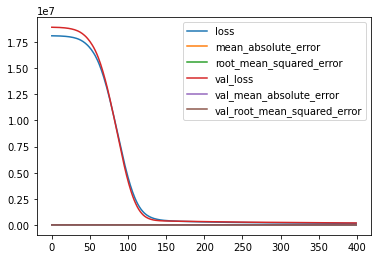

In [19]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [20]:
# loss = model.history.history['loss']
# sns.lineplot(x=range(len(loss)),y=loss)
# plt.title("Training Loss per Epoch");

In [21]:
model.metrics_names

['loss', 'mean_absolute_error', 'root_mean_squared_error']

In [22]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

In [23]:
training_score

[149459.9375, 309.27911376953125, 386.6004638671875]

In [24]:
test_score

[187380.5, 354.1181945800781, 432.8747253417969]

In [25]:
test_predictions = model.predict(X_test)
test_predictions = pd.Series(test_predictions.reshape(test_predictions.shape[0],))

In [26]:
test_predictions

0     4374.601074
1     3777.002441
2     5068.783691
3     4457.427246
4     3822.273438
         ...     
95    4594.201172
96    5601.832520
97    3181.252441
98    5917.878418
99    3452.659668
Length: 100, dtype: float32

In [27]:
pred_df = pd.DataFrame(y_test).reset_index(drop = True)
pred_df['Model_Predictions'] = test_predictions
pred_df.columns = ['Test_Y','Model_Predictions']

In [28]:
pred_df

,Test_Y,Model_Predictions
0,4400.0,4374.601074
1,3150.0,3777.002441
2,4700.0,5068.783691
3,4200.0,4457.427246
4,3325.0,3822.273438
...,...,...
95,4850.0,4594.201172
96,5450.0,5601.832520
97,3000.0,3181.252441
98,5000.0,5917.878418


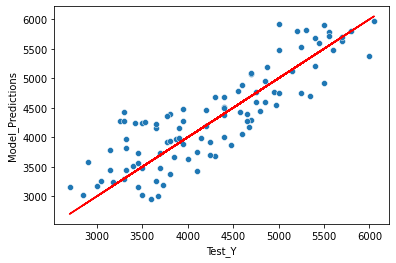

In [29]:
sns.scatterplot(x='Test_Y',y='Model_Predictions',data=pred_df)
plt.plot(y_test,y_test,'r')

In [30]:
pred_df['Error'] = pred_df['Test_Y'] - pred_df['Model_Predictions']

C:\Users\andre\anaconda3\envs\tensorflow_gpu_1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


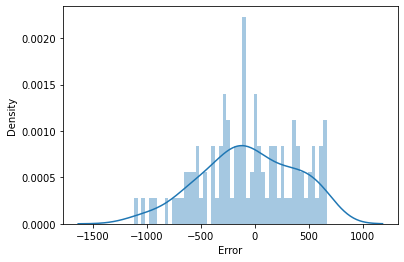

In [31]:
sns.distplot(pred_df['Error'],bins=50);

In [32]:
print(f'Mean Absolute Error: {metrics.mean_absolute_error(pred_df["Test_Y"],pred_df["Model_Predictions"])}')
print(f'Mean Squared Error: {metrics.mean_squared_error(pred_df["Test_Y"],pred_df["Model_Predictions"])}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(pred_df["Test_Y"],pred_df["Model_Predictions"]))}')

Mean Absolute Error: 354.11820556640623
Mean Squared Error: 187380.49576842727
Root Mean Squared Error: 432.8746882972337


In [33]:
np.sqrt(metrics.mean_squared_error(pred_df["Test_Y"],pred_df["Model_Predictions"]))/pred_df["Test_Y"].mean()

0.10132834463886557

In [34]:
metrics.explained_variance_score(pred_df["Test_Y"],pred_df["Model_Predictions"])

0.7252434934463039

## Early Stopping

In [35]:
model = Sequential()

model.add(Dense(8,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(4,activation='relu'))

# Final output node for prediction
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse', metrics=[ 'MeanAbsoluteError', 'RootMeanSquaredError'])

In [36]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [37]:
model.fit(x=X_train,y=y_train, 
          validation_data=(X_test,y_test.values), 
          batch_size=32,
          epochs=400, 
          verbose = 1, 
          callbacks=[early_stop, board])

Epoch 1/400
8/8 [==============================] - 1s 53ms/step - loss: 18098706.0000 - mean_absolute_error: 4179.0562 - root_mean_squared_error: 4254.2573 - val_loss: 18917980.0000 - val_mean_absolute_error: 4271.8447 - val_root_mean_squared_error: 4349.4805
Epoch 2/400
8/8 [==============================] - 0s 19ms/step - loss: 18098312.0000 - mean_absolute_error: 4179.0049 - root_mean_squared_error: 4254.2114 - val_loss: 18917534.0000 - val_mean_absolute_error: 4271.7871 - val_root_mean_squared_error: 4349.4287
Epoch 3/400
8/8 [==============================] - 0s 19ms/step - loss: 18097878.0000 - mean_absolute_error: 4178.9487 - root_mean_squared_error: 4254.1602 - val_loss: 18917022.0000 - val_mean_absolute_error: 4271.7212 - val_root_mean_squared_error: 4349.3701
Epoch 4/400
8/8 [==============================] - 0s 18ms/step - loss: 18097368.0000 - mean_absolute_error: 4178.8838 - root_mean_squared_error: 4254.1001 - val_loss: 18916422.0000 - val_mean_absolute_error: 4271.6455 -

8/8 [==============================] - 0s 17ms/step - loss: 17877110.0000 - mean_absolute_error: 4151.8374 - root_mean_squared_error: 4228.1333 - val_loss: 18662596.0000 - val_mean_absolute_error: 4240.8657 - val_root_mean_squared_error: 4320.0225
Epoch 33/400
8/8 [==============================] - 0s 17ms/step - loss: 17850544.0000 - mean_absolute_error: 4148.5840 - root_mean_squared_error: 4224.9902 - val_loss: 18632692.0000 - val_mean_absolute_error: 4237.2285 - val_root_mean_squared_error: 4316.5605
Epoch 34/400
8/8 [==============================] - 0s 19ms/step - loss: 17821480.0000 - mean_absolute_error: 4144.9746 - root_mean_squared_error: 4221.5493 - val_loss: 18599650.0000 - val_mean_absolute_error: 4233.2217 - val_root_mean_squared_error: 4312.7314
Epoch 35/400
8/8 [==============================] - 0s 20ms/step - loss: 17789482.0000 - mean_absolute_error: 4141.0537 - root_mean_squared_error: 4217.7583 - val_loss: 18563592.0000 - val_mean_absolute_error: 4228.8340 - val_root

8/8 [==============================] - 0s 19ms/step - loss: 14584608.0000 - mean_absolute_error: 3736.4856 - root_mean_squared_error: 3818.9802 - val_loss: 14972511.0000 - val_mean_absolute_error: 3779.8179 - val_root_mean_squared_error: 3869.4326
Epoch 64/400
8/8 [==============================] - 0s 17ms/step - loss: 14346731.0000 - mean_absolute_error: 3704.8979 - root_mean_squared_error: 3787.7080 - val_loss: 14705934.0000 - val_mean_absolute_error: 3744.8608 - val_root_mean_squared_error: 3834.8320
Epoch 65/400
8/8 [==============================] - 0s 19ms/step - loss: 14095317.0000 - mean_absolute_error: 3671.7124 - root_mean_squared_error: 3754.3728 - val_loss: 14431336.0000 - val_mean_absolute_error: 3708.4285 - val_root_mean_squared_error: 3798.8596
Epoch 66/400
8/8 [==============================] - 0s 18ms/step - loss: 13838138.0000 - mean_absolute_error: 3637.0247 - root_mean_squared_error: 3719.9648 - val_loss: 14141545.0000 - val_mean_absolute_error: 3669.8613 - val_root

8/8 [==============================] - 0s 16ms/step - loss: 4484747.5000 - mean_absolute_error: 2020.4344 - root_mean_squared_error: 2117.7222 - val_loss: 4020061.0000 - val_mean_absolute_error: 1895.3168 - val_root_mean_squared_error: 2005.0089
Epoch 95/400
8/8 [==============================] - 0s 15ms/step - loss: 4189284.7500 - mean_absolute_error: 1946.7529 - root_mean_squared_error: 2046.7742 - val_loss: 3715262.5000 - val_mean_absolute_error: 1815.2325 - val_root_mean_squared_error: 1927.5017
Epoch 96/400
8/8 [==============================] - 0s 17ms/step - loss: 3904267.5000 - mean_absolute_error: 1872.3105 - root_mean_squared_error: 1975.9220 - val_loss: 3428946.0000 - val_mean_absolute_error: 1736.1053 - val_root_mean_squared_error: 1851.7413
Epoch 97/400
8/8 [==============================] - 0s 14ms/step - loss: 3634909.0000 - mean_absolute_error: 1799.2349 - root_mean_squared_error: 1906.5437 - val_loss: 3154162.5000 - val_mean_absolute_error: 1656.8125 - val_root_mean_sq

Epoch 126/400
8/8 [==============================] - 0s 16ms/step - loss: 625413.6250 - mean_absolute_error: 577.0895 - root_mean_squared_error: 790.8309 - val_loss: 431511.1250 - val_mean_absolute_error: 525.1623 - val_root_mean_squared_error: 656.8951
Epoch 127/400
8/8 [==============================] - 0s 15ms/step - loss: 613076.3750 - mean_absolute_error: 570.3462 - root_mean_squared_error: 782.9919 - val_loss: 429157.4062 - val_mean_absolute_error: 526.4617 - val_root_mean_squared_error: 655.1011
Epoch 128/400
8/8 [==============================] - 0s 15ms/step - loss: 602618.2500 - mean_absolute_error: 565.6001 - root_mean_squared_error: 776.2849 - val_loss: 427501.1875 - val_mean_absolute_error: 527.6149 - val_root_mean_squared_error: 653.8358
Epoch 129/400
8/8 [==============================] - 0s 15ms/step - loss: 593393.3750 - mean_absolute_error: 561.1717 - root_mean_squared_error: 770.3204 - val_loss: 426863.5625 - val_mean_absolute_error: 528.8823 - val_root_mean_squared_

## Evaluation

In [38]:
model.history.history

{'loss': [18098706.0,
  18098312.0,
  18097878.0,
  18097368.0,
  18096760.0,
  18096004.0,
  18095080.0,
  18093932.0,
  18092588.0,
  18091012.0,
  18089202.0,
  18087112.0,
  18084684.0,
  18081854.0,
  18078582.0,
  18074808.0,
  18070418.0,
  18065346.0,
  18059578.0,
  18053054.0,
  18045628.0,
  18037270.0,
  18027832.0,
  18017150.0,
  18005430.0,
  17992246.0,
  17977582.0,
  17961388.0,
  17943322.0,
  17923412.0,
  17901382.0,
  17877110.0,
  17850544.0,
  17821480.0,
  17789482.0,
  17754420.0,
  17716148.0,
  17674520.0,
  17628686.0,
  17579278.0,
  17525610.0,
  17468234.0,
  17405334.0,
  17337994.0,
  17265362.0,
  17185404.0,
  17099308.0,
  17006612.0,
  16905542.0,
  16798274.0,
  16681872.0,
  16559553.0,
  16426109.0,
  16284792.0,
  16134059.0,
  15971611.0,
  15802047.0,
  15623147.0,
  15434078.0,
  15236732.0,
  15032131.0,
  14811044.0,
  14584608.0,
  14346731.0,
  14095317.0,
  13838138.0,
  13569793.0,
  13289286.0,
  13002727.0,
  12706471.0,
  12402472.0

<AxesSubplot:>

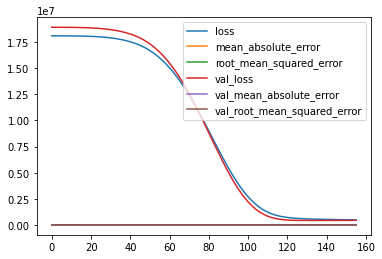

In [39]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [40]:
# loss = model.history.history['loss']
# sns.lineplot(x=range(len(loss)),y=loss)
# plt.title("Training Loss per Epoch");

In [41]:
model.metrics_names

['loss', 'mean_absolute_error', 'root_mean_squared_error']

In [42]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

In [43]:
training_score

[474651.875, 518.234619140625, 688.9498291015625]

In [44]:
test_score

[438205.875, 545.2116088867188, 661.97119140625]

In [45]:
test_predictions = model.predict(X_test)
test_predictions = pd.Series(test_predictions.reshape(test_predictions.shape[0],))

In [46]:
test_predictions

0     3480.801025
1     4235.575684
2     4907.196289
3     4451.155762
4     4714.183105
         ...     
95    4709.500000
96    5821.151855
97    3500.576172
98    6025.304688
99    3776.142334
Length: 100, dtype: float32

In [47]:
pred_df = pd.DataFrame(y_test).reset_index(drop = True)
pred_df['Model_Predictions'] = test_predictions
pred_df.columns = ['Test_Y','Model_Predictions']

In [48]:
pred_df

,Test_Y,Model_Predictions
0,4400.0,3480.801025
1,3150.0,4235.575684
2,4700.0,4907.196289
3,4200.0,4451.155762
4,3325.0,4714.183105
...,...,...
95,4850.0,4709.500000
96,5450.0,5821.151855
97,3000.0,3500.576172
98,5000.0,6025.304688


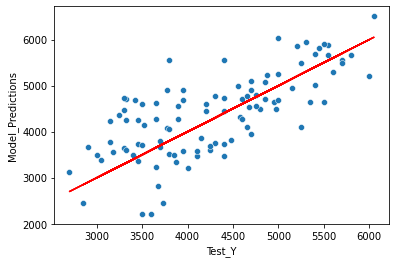

In [49]:
sns.scatterplot(x='Test_Y',y='Model_Predictions',data=pred_df)
plt.plot(y_test,y_test,'r')

In [50]:
pred_df['Error'] = pred_df['Test_Y'] - pred_df['Model_Predictions']

C:\Users\andre\anaconda3\envs\tensorflow_gpu_1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


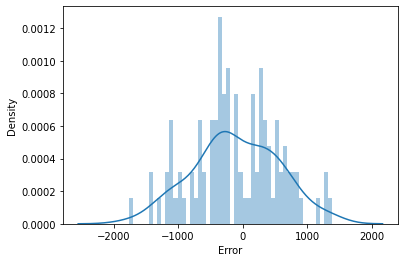

In [51]:
sns.distplot(pred_df['Error'],bins=50);

In [52]:
print(f'Mean Absolute Error: {metrics.mean_absolute_error(pred_df["Test_Y"],pred_df["Model_Predictions"])}')
print(f'Mean Squared Error: {metrics.mean_squared_error(pred_df["Test_Y"],pred_df["Model_Predictions"])}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(pred_df["Test_Y"],pred_df["Model_Predictions"]))}')

Mean Absolute Error: 545.2115966796875
Mean Squared Error: 438205.8581358838
Root Mean Squared Error: 661.9711913186886


In [53]:
np.sqrt(metrics.mean_squared_error(pred_df["Test_Y"],pred_df["Model_Predictions"]))/pred_df["Test_Y"].mean()

0.1549558032113035

In [54]:
metrics.explained_variance_score(pred_df["Test_Y"],pred_df["Model_Predictions"])

0.3610817821452419

## Adding in DropOut Layers

In [55]:
model = Sequential()

model.add(Dense(8,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(6,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(4,activation='relu'))
model.add(Dropout(0.5))

# Final output node for prediction
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse', metrics=[ 'MeanAbsoluteError', 'RootMeanSquaredError'])

In [56]:
model.fit(x=X_train,
          y=y_train, 
          validation_data=(X_test,y_test.values), 
          batch_size=32,
          epochs=400, 
          verbose = 1, 
          callbacks=[early_stop])

Epoch 1/400
8/8 [==============================] - 2s 62ms/step - loss: 18102748.0000 - mean_absolute_error: 4179.5923 - root_mean_squared_error: 4254.7324 - val_loss: 18920906.0000 - val_mean_absolute_error: 4272.2520 - val_root_mean_squared_error: 4349.8164
Epoch 2/400
8/8 [==============================] - 0s 20ms/step - loss: 18102714.0000 - mean_absolute_error: 4179.5586 - root_mean_squared_error: 4254.7285 - val_loss: 18920174.0000 - val_mean_absolute_error: 4272.1689 - val_root_mean_squared_error: 4349.7324
Epoch 3/400
8/8 [==============================] - 0s 18ms/step - loss: 18102486.0000 - mean_absolute_error: 4179.5298 - root_mean_squared_error: 4254.7017 - val_loss: 18919508.0000 - val_mean_absolute_error: 4272.0923 - val_root_mean_squared_error: 4349.6562
Epoch 4/400
8/8 [==============================] - 0s 18ms/step - loss: 18100856.0000 - mean_absolute_error: 4179.3623 - root_mean_squared_error: 4254.5103 - val_loss: 18918824.0000 - val_mean_absolute_error: 4272.0142 -

8/8 [==============================] - 0s 18ms/step - loss: 18064928.0000 - mean_absolute_error: 4175.4741 - root_mean_squared_error: 4250.2856 - val_loss: 18881090.0000 - val_mean_absolute_error: 4267.9897 - val_root_mean_squared_error: 4345.2378
Epoch 33/400
8/8 [==============================] - 0s 18ms/step - loss: 18064210.0000 - mean_absolute_error: 4175.3594 - root_mean_squared_error: 4250.2012 - val_loss: 18877602.0000 - val_mean_absolute_error: 4267.6270 - val_root_mean_squared_error: 4344.8364
Epoch 34/400
8/8 [==============================] - 0s 16ms/step - loss: 18065124.0000 - mean_absolute_error: 4175.3584 - root_mean_squared_error: 4250.3086 - val_loss: 18873900.0000 - val_mean_absolute_error: 4267.2407 - val_root_mean_squared_error: 4344.4102
Epoch 35/400
8/8 [==============================] - 0s 15ms/step - loss: 18059790.0000 - mean_absolute_error: 4174.8481 - root_mean_squared_error: 4249.6812 - val_loss: 18869990.0000 - val_mean_absolute_error: 4266.8291 - val_root

8/8 [==============================] - 0s 15ms/step - loss: 17431806.0000 - mean_absolute_error: 4108.2168 - root_mean_squared_error: 4175.1416 - val_loss: 18308918.0000 - val_mean_absolute_error: 4207.5811 - val_root_mean_squared_error: 4278.8921
Epoch 64/400
8/8 [==============================] - 0s 15ms/step - loss: 17502362.0000 - mean_absolute_error: 4114.8228 - root_mean_squared_error: 4183.5825 - val_loss: 18252298.0000 - val_mean_absolute_error: 4201.5220 - val_root_mean_squared_error: 4272.2710
Epoch 65/400
8/8 [==============================] - 0s 14ms/step - loss: 17547986.0000 - mean_absolute_error: 4118.4253 - root_mean_squared_error: 4189.0317 - val_loss: 18194722.0000 - val_mean_absolute_error: 4195.3193 - val_root_mean_squared_error: 4265.5273
Epoch 66/400
8/8 [==============================] - 0s 14ms/step - loss: 17328564.0000 - mean_absolute_error: 4095.8696 - root_mean_squared_error: 4162.7593 - val_loss: 18130752.0000 - val_mean_absolute_error: 4188.4263 - val_root

8/8 [==============================] - 0s 19ms/step - loss: 13509064.0000 - mean_absolute_error: 3583.0618 - root_mean_squared_error: 3675.4678 - val_loss: 14227171.0000 - val_mean_absolute_error: 3731.7000 - val_root_mean_squared_error: 3771.8921
Epoch 95/400
8/8 [==============================] - 0s 17ms/step - loss: 14114540.0000 - mean_absolute_error: 3675.9326 - root_mean_squared_error: 3756.9324 - val_loss: 14005842.0000 - val_mean_absolute_error: 3703.4937 - val_root_mean_squared_error: 3742.4380
Epoch 96/400
8/8 [==============================] - 0s 17ms/step - loss: 13718886.0000 - mean_absolute_error: 3602.0210 - root_mean_squared_error: 3703.9016 - val_loss: 13777303.0000 - val_mean_absolute_error: 3674.1921 - val_root_mean_squared_error: 3711.7788
Epoch 97/400
8/8 [==============================] - 0s 21ms/step - loss: 13239783.0000 - mean_absolute_error: 3543.6584 - root_mean_squared_error: 3638.6514 - val_loss: 13536507.0000 - val_mean_absolute_error: 3643.0952 - val_root

8/8 [==============================] - 0s 18ms/step - loss: 9844604.0000 - mean_absolute_error: 2867.3740 - root_mean_squared_error: 3137.6113 - val_loss: 7731287.0000 - val_mean_absolute_error: 2753.3887 - val_root_mean_squared_error: 2780.5193
Epoch 126/400
8/8 [==============================] - 0s 18ms/step - loss: 10238465.0000 - mean_absolute_error: 2916.6062 - root_mean_squared_error: 3199.7603 - val_loss: 7606427.0000 - val_mean_absolute_error: 2730.4814 - val_root_mean_squared_error: 2757.9751
Epoch 127/400
8/8 [==============================] - 0s 21ms/step - loss: 9939934.0000 - mean_absolute_error: 2891.1907 - root_mean_squared_error: 3152.7664 - val_loss: 7472973.5000 - val_mean_absolute_error: 2705.7612 - val_root_mean_squared_error: 2733.6741
Epoch 128/400
8/8 [==============================] - 0s 21ms/step - loss: 9874455.0000 - mean_absolute_error: 2847.3086 - root_mean_squared_error: 3142.3645 - val_loss: 7387628.0000 - val_mean_absolute_error: 2689.7429 - val_root_mea

8/8 [==============================] - 0s 16ms/step - loss: 9570285.0000 - mean_absolute_error: 2799.7310 - root_mean_squared_error: 3093.5879 - val_loss: 5355405.0000 - val_mean_absolute_error: 2279.0645 - val_root_mean_squared_error: 2314.1748
Epoch 157/400
8/8 [==============================] - 0s 15ms/step - loss: 10033305.0000 - mean_absolute_error: 2717.7729 - root_mean_squared_error: 3167.5391 - val_loss: 5316783.5000 - val_mean_absolute_error: 2270.5503 - val_root_mean_squared_error: 2305.8152
Epoch 158/400
8/8 [==============================] - 0s 16ms/step - loss: 9177595.0000 - mean_absolute_error: 2660.5669 - root_mean_squared_error: 3029.4546 - val_loss: 5327605.0000 - val_mean_absolute_error: 2272.8530 - val_root_mean_squared_error: 2308.1604
Epoch 159/400
8/8 [==============================] - 0s 15ms/step - loss: 9271586.0000 - mean_absolute_error: 2740.4846 - root_mean_squared_error: 3044.9280 - val_loss: 5305793.5000 - val_mean_absolute_error: 2267.8938 - val_root_mea

8/8 [==============================] - 0s 18ms/step - loss: 9877346.0000 - mean_absolute_error: 2823.6711 - root_mean_squared_error: 3142.8245 - val_loss: 5138286.0000 - val_mean_absolute_error: 2228.1804 - val_root_mean_squared_error: 2266.7788
Epoch 188/400
8/8 [==============================] - 0s 16ms/step - loss: 9103962.0000 - mean_absolute_error: 2696.1355 - root_mean_squared_error: 3017.2773 - val_loss: 5087698.0000 - val_mean_absolute_error: 2217.1052 - val_root_mean_squared_error: 2255.5928
Epoch 189/400
8/8 [==============================] - 0s 15ms/step - loss: 8471085.0000 - mean_absolute_error: 2601.4565 - root_mean_squared_error: 2910.5129 - val_loss: 5019593.5000 - val_mean_absolute_error: 2202.1162 - val_root_mean_squared_error: 2240.4451
Epoch 190/400
8/8 [==============================] - 0s 17ms/step - loss: 9532231.0000 - mean_absolute_error: 2765.0962 - root_mean_squared_error: 3087.4312 - val_loss: 4960305.0000 - val_mean_absolute_error: 2188.6660 - val_root_mean

## Evaluation

In [57]:
model.history.history

{'loss': [18102748.0,
  18102714.0,
  18102486.0,
  18100856.0,
  18100216.0,
  18099140.0,
  18098752.0,
  18098442.0,
  18097082.0,
  18097606.0,
  18097214.0,
  18095074.0,
  18096732.0,
  18093514.0,
  18094776.0,
  18094334.0,
  18093042.0,
  18092032.0,
  18090694.0,
  18091274.0,
  18088456.0,
  18087120.0,
  18084860.0,
  18086528.0,
  18082658.0,
  18087506.0,
  18074850.0,
  18073634.0,
  18074782.0,
  18072434.0,
  18070198.0,
  18064928.0,
  18064210.0,
  18065124.0,
  18059790.0,
  18047006.0,
  18057158.0,
  18059452.0,
  18024270.0,
  18021156.0,
  18026992.0,
  18007552.0,
  18024834.0,
  18028292.0,
  17975036.0,
  17992806.0,
  17937302.0,
  17961802.0,
  17936990.0,
  17921746.0,
  17925992.0,
  17918346.0,
  17871070.0,
  17828472.0,
  17831138.0,
  17834984.0,
  17861622.0,
  17726084.0,
  17800342.0,
  17693084.0,
  17591906.0,
  17629356.0,
  17431806.0,
  17502362.0,
  17547986.0,
  17328564.0,
  17408972.0,
  17203046.0,
  17306520.0,
  17305194.0,
  17215556.0

<AxesSubplot:>

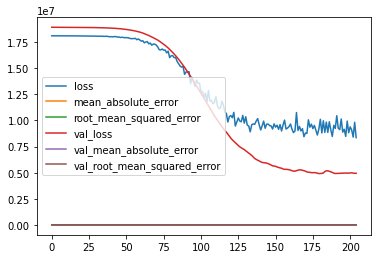

In [58]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [59]:
# loss = model.history.history['loss']
# sns.lineplot(x=range(len(loss)),y=loss)
# plt.title("Training Loss per Epoch");

In [60]:
model.metrics_names

['loss', 'mean_absolute_error', 'root_mean_squared_error']

In [61]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

In [62]:
training_score

[4829243.5, 2164.52978515625, 2197.553955078125]

In [63]:
test_score

[4943236.0, 2184.3466796875, 2223.339111328125]

In [64]:
test_predictions = model.predict(X_test)
test_predictions = pd.Series(test_predictions.reshape(test_predictions.shape[0],))

In [65]:
test_predictions

0     1982.687134
1     1741.023560
2     2405.790039
3     2161.472168
4     1375.090088
         ...     
95    2261.494873
96    3191.140381
97    1501.594360
98    3265.656494
99    1316.912354
Length: 100, dtype: float32

In [66]:
pred_df = pd.DataFrame(y_test).reset_index(drop = True)
pred_df['Model_Predictions'] = test_predictions
pred_df.columns = ['Test_Y','Model_Predictions']

In [67]:
pred_df

,Test_Y,Model_Predictions
0,4400.0,1982.687134
1,3150.0,1741.023560
2,4700.0,2405.790039
3,4200.0,2161.472168
4,3325.0,1375.090088
...,...,...
95,4850.0,2261.494873
96,5450.0,3191.140381
97,3000.0,1501.594360
98,5000.0,3265.656494


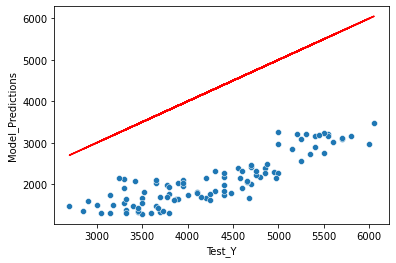

In [68]:
sns.scatterplot(x='Test_Y',y='Model_Predictions',data=pred_df)
plt.plot(y_test,y_test,'r')

In [69]:
pred_df['Error'] = pred_df['Test_Y'] - pred_df['Model_Predictions']

C:\Users\andre\anaconda3\envs\tensorflow_gpu_1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


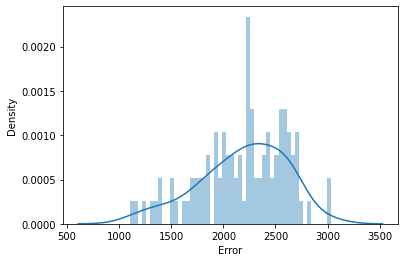

In [70]:
sns.distplot(pred_df['Error'],bins=50);

In [71]:
print(f'Mean Absolute Error: {metrics.mean_absolute_error(pred_df["Test_Y"],pred_df["Model_Predictions"])}')
print(f'Mean Squared Error: {metrics.mean_squared_error(pred_df["Test_Y"],pred_df["Model_Predictions"])}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(pred_df["Test_Y"],pred_df["Model_Predictions"]))}')

Mean Absolute Error: 2184.346778564453
Mean Squared Error: 4943235.96179743
Root Mean Squared Error: 2223.3389219364262


In [72]:
np.sqrt(metrics.mean_squared_error(pred_df["Test_Y"],pred_df["Model_Predictions"]))/pred_df["Test_Y"].mean()

0.5204445041986017

In [73]:
metrics.explained_variance_score(pred_df["Test_Y"],pred_df["Model_Predictions"])

0.7431652044895796

## Saving and Loading a Model

In [74]:
# from tensorflow.keras.models import load_model

In [75]:
# model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

In [76]:
# later_model = load_model('my_model.h5')